In [1]:
import pandas as pd
import numpy as np
from fake_useragent import UserAgent
import requests
import pyprind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def getRequest(table='baggage', key='jmdSHjy6WPaXwoR75E6mJ1ImhxKPRJb51v6DBS0A',
               url="https://junction.dev.qoco.fi/api/", baggageId=''):
    ua = UserAgent()
    header = {'User-Agent':str(ua.chrome), 'x-api-key':key}
    url = url + table + '/' + baggageId
    
    response = requests.get(url, headers=header).json()
    response = pd.DataFrame.from_dict(response[list(response.keys())[0]])
    
    return response

In [3]:
def combineDataBases():
    
    '''
    table = info about parameters, function
    
    '''
    baggage = getRequest(table='baggage')
    print(baggage.shape)
    display(baggage.head())

    customers = getRequest(table='customers')
    print(customers.shape)
    display(customers.head())

    events = pd.DataFrame()
    pbar = pyprind.ProgBar(baggage.shape[0], width=baggage.shape[0])
    for baggageId in baggage.baggageId.unique():
        event = getRequest(table='events', baggageId=baggageId)
        events = events.append(event, sort=False, ignore_index=True)
        pbar.update()
    print(events.shape)
    display(events.head())

    baggage_customer = pd.merge(baggage, customers, how='inner', on='customerId')
    events_baggage_customer = pd.merge(events, baggage_customer, how='inner', on='baggageId')
    display(events_baggage_customer.info())
    display(events_baggage_customer.head())

    return events_baggage_customer, baggage_customer, events, customers, baggage

In [4]:
travels, baggage_customer, events, customers, baggage = combineDataBases()
travels.to_csv('travels.csv', index=False)
baggage_customer.to_csv('baggage_customer.csv', index=False)
events.to_csv('events.csv', index=False)
customers.to_csv('customers.csv', index=False)
baggage.to_csv('baggage.csv', index=False)

(36, 5)


,baggageId,customerId,rushbag,special,weight
0,4202cdca-9176-4b6c-aced-745f90741712,9a55a8c6-5da0-4ac1-8527-dad2776c6db6,N,N,15.3
1,90cda708-b57d-4195-b30d-627e9f99ea36,72a12e94-fbce-437f-a774-df9aa9ce3639,N,H,39.1
2,e4bd8e79-59c2-42c1-be9a-34c9d5c61f18,d3491a80-9973-4a3a-954c-89dfe686af02,N,N,8.4
3,267c8126-b658-426a-99e8-44b553828790,4aa5d121-8b96-4bc5-b1bf-09d98b918f75,N,N,16.2
4,efd334e2-576a-4d92-9cb9-755ec7de04d7,b2454709-913e-4a35-9cc1-397010209bc0,N,CH,42.9


(30, 5)


,customerId,email,name,phone,target
0,a2b12490-e469-4590-973d-5fb3b2a49c38,amanda.virtanen@qoco.aero,Amanda Virtanen,+450 8272902,ATL
1,fb94800f-172f-48f3-b734-55fcdf451e3f,juhani.virtanen@qoco.aero,Juhani Virtanen,+864 5626078,HND
2,37cb5035-6e81-4a90-aa28-6f56a8d5f85b,elias.hämäläinen@qoco.aero,Elias Hämäläinen,+291 1565751,LHR
3,42f8dde7-73c7-440a-8761-89351f93f801,helmi.hämäläinen@qoco.aero,Helmi Hämäläinen,+602 5076164,PVG
4,58cc6402-95ac-4a08-bd98-71fe45a2ca46,ilmari.mäkelä@qoco.aero,Ilmari Mäkelä,+561 7496442,LHR


0% [####################################] 100% | ETA: 00:00:00

(173, 5)



Total time elapsed: 00:00:06


,airport,baggageId,eventId,timestamp,type
0,HKG,4202cdca-9176-4b6c-aced-745f90741712,bbc4fcbe-fbc1-433f-9c1e-7ea9e377208a,2019-11-15T03:34:38.057Z,CHECKED_IN
1,HKG,4202cdca-9176-4b6c-aced-745f90741712,ff643632-2695-4a97-8b69-efe151639e9a,2019-11-15T04:28:01.831Z,LOADED
2,PVG,4202cdca-9176-4b6c-aced-745f90741712,6fc672b2-95c8-4c93-90fd-8109336cd51a,2019-11-15T08:04:14.758Z,UNLOADED
3,PVG,4202cdca-9176-4b6c-aced-745f90741712,fd7e0454-483a-4178-a09c-4d9852408d70,2019-11-15T08:49:27.087Z,CLAIMED
4,ORD,90cda708-b57d-4195-b30d-627e9f99ea36,149ca57e-fbfb-49a7-ab78-6a9423e571ed,2019-11-15T10:26:39.370Z,CHECKED_IN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 13 columns):
airport       173 non-null object
baggageId     173 non-null object
eventId       173 non-null object
timestamp     173 non-null object
type          173 non-null object
customerId    173 non-null object
rushbag       173 non-null object
special       173 non-null object
weight        173 non-null float64
email         173 non-null object
name          173 non-null object
phone         173 non-null object
target        173 non-null object
dtypes: float64(1), object(12)
memory usage: 18.9+ KB


None

,airport,baggageId,eventId,timestamp,type,customerId,rushbag,special,weight,email,name,phone,target
0,HKG,4202cdca-9176-4b6c-aced-745f90741712,bbc4fcbe-fbc1-433f-9c1e-7ea9e377208a,2019-11-15T03:34:38.057Z,CHECKED_IN,9a55a8c6-5da0-4ac1-8527-dad2776c6db6,N,N,15.3,elias.nieminen@qoco.aero,Elias Nieminen,+654 9690238,PVG
1,HKG,4202cdca-9176-4b6c-aced-745f90741712,ff643632-2695-4a97-8b69-efe151639e9a,2019-11-15T04:28:01.831Z,LOADED,9a55a8c6-5da0-4ac1-8527-dad2776c6db6,N,N,15.3,elias.nieminen@qoco.aero,Elias Nieminen,+654 9690238,PVG
2,PVG,4202cdca-9176-4b6c-aced-745f90741712,6fc672b2-95c8-4c93-90fd-8109336cd51a,2019-11-15T08:04:14.758Z,UNLOADED,9a55a8c6-5da0-4ac1-8527-dad2776c6db6,N,N,15.3,elias.nieminen@qoco.aero,Elias Nieminen,+654 9690238,PVG
3,PVG,4202cdca-9176-4b6c-aced-745f90741712,fd7e0454-483a-4178-a09c-4d9852408d70,2019-11-15T08:49:27.087Z,CLAIMED,9a55a8c6-5da0-4ac1-8527-dad2776c6db6,N,N,15.3,elias.nieminen@qoco.aero,Elias Nieminen,+654 9690238,PVG
4,ORD,90cda708-b57d-4195-b30d-627e9f99ea36,149ca57e-fbfb-49a7-ab78-6a9423e571ed,2019-11-15T10:26:39.370Z,CHECKED_IN,72a12e94-fbce-437f-a774-df9aa9ce3639,N,H,39.1,ilona.nieminen@qoco.aero,Ilona Nieminen,+314 5718648,PVG


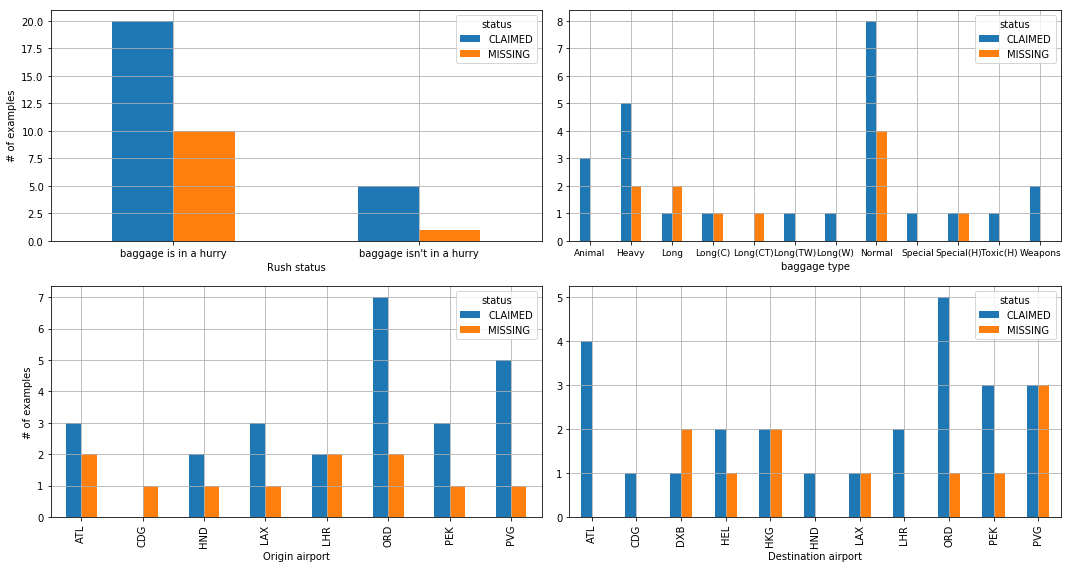

In [5]:
missed = events.groupby(['baggageId']).apply(lambda x: x.type.unique()[-1]).rename('status')
origin_airport = events.groupby(['baggageId']).apply(lambda x: x.airport.unique()[0]).rename('origin_airport')
baggage_customer_a = pd.merge(baggage_customer, missed, on=['baggageId'], how='inner')
baggage_customer_a = pd.merge(baggage_customer_a, origin_airport, on=['baggageId'], how='inner')
baggage_customer_a.replace({'rushbag':{'N':"baggage is in a hurry",
                                      'Y':"baggage isn't in a hurry"}},inplace=True)
baggage_customer_a.replace({'special':{'N':"Normal",
                                      'A':"Animal",
                                       'L':'Long',
                                       'H':'Heavy',
                                       'C':'Special',
                                       'T':'Toxic',
                                       'W':'Weapons',
                                      'CH':'Special(H)',
                                       'LCT':'Long(CT)',
                                       'TH':'Toxic(H)',
                                       'LW':'Long(W)',
                                       'LC':'Long(C)',
                                       'LTW':'Long(TW)',
                                      
                                      }},inplace=True)
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(221)
df2 = baggage_customer_a.groupby(['rushbag','status'])['rushbag'].count().unstack('status').fillna(0).plot(kind='bar',
                                                                                                          stacked=False,
                                                                                                          figsize=(15,8),
                                                                                                           ax=ax1,
                                                                                                          grid=True)
plt.xlabel('Rush status')
plt.ylabel('# of examples')
plt.xticks(rotation=0)
ax2 = fig.add_subplot(222)
df2 = baggage_customer_a.groupby(['special','status'])['special'].count().unstack('status').fillna(0).plot(kind='bar',
                                                                                                          stacked=False,
                                                                                                          figsize=(15,8),
                                                                                                           ax=ax2,
                                                                                                          grid=True)
plt.xticks(rotation=0,fontsize=9)
plt.xlabel('baggage type')
ax3 = fig.add_subplot(223)
df2 = baggage_customer_a.groupby(['target','status'])['target'].count().unstack('status').fillna(0).plot(kind='bar',
                                                                                                          stacked=False,
                                                                                                          figsize=(15,8),
                                                                                                         ax=ax3,
                                                                                                          grid=True)
plt.ylabel('# of examples')
plt.xlabel('Origin airport')
ax4 = fig.add_subplot(224)
df2 = baggage_customer_a.groupby(['origin_airport','status'])['origin_airport'].count().unstack('status').fillna(0).plot(kind='bar',
                                                                                                          stacked=False,
                                                                                                          figsize=(15,8),
                                                                                                            ax=ax4,
                                                                                                          grid=True)
plt.xlabel('Destination airport')
plt.tight_layout()
plt.savefig('DataAnalytics.png')
